<a href="https://colab.research.google.com/github/KIVILCIIM/Data-Science/blob/main/Python_ML_K_Ortalama_K%C3%BCmeleme_Y%C3%B6ntemi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Kütüphaneyi içe aktar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Veri setini oluşturalım

# Küme 1
x1 = np.random.normal(25,5,1000) #25 ortaalamllı standats sapması 5 olan 1000 nokta seçilecek
y1 = np.random.normal(25,5,1000)

# Küme 2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# Küme 3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)


x = np.concatenate((x1,x2,x3), axis = 0) #tüm satıları tek değişkene atadık
y= np.concatenate((y1,y2,y3), axis = 0)

dictionary = {"x": x, "y": y}

data = pd.DataFrame(dictionary)
data.head()

,x,y
0,29.442001,27.497124
1,25.026133,26.305222
2,30.403916,30.904855
3,42.938448,17.542384
4,22.027455,26.326456


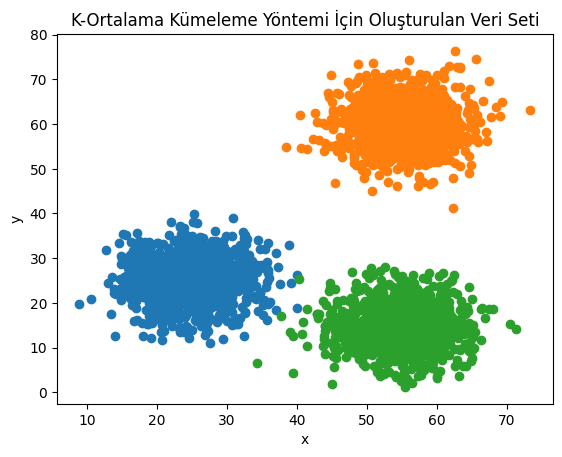

In [17]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Ortalama Kümeleme Yöntemi İçin Oluşturulan Veri Seti")
plt.show()

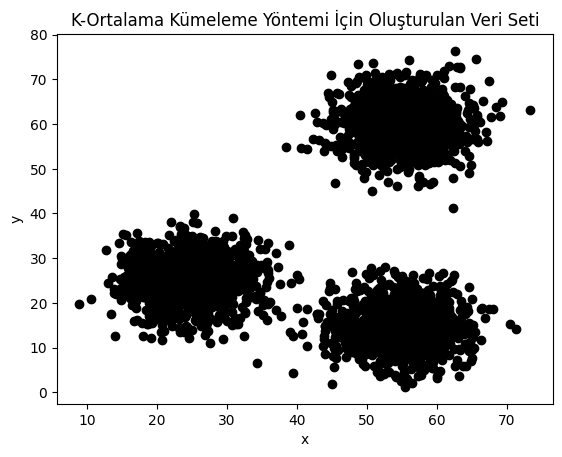

In [18]:
# k ortalama algoritması veriyi bu şekilde görecektir:
plt.figure()
plt.scatter(x1,y1, color = "black")
plt.scatter(x2,y2, color = "black")
plt.scatter(x3,y3, color = "black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Ortalama Kümeleme Yöntemi İçin Oluşturulan Veri Seti")
plt.show()

K-Değeri "Elbow" (Dirsek) metodu ile hesaplanır.

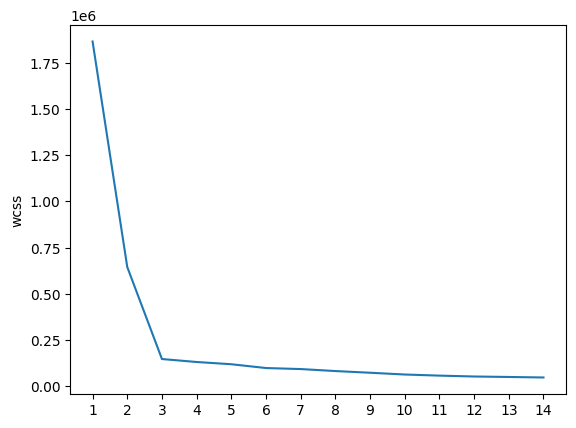

In [20]:
# k ortalamayı içe aktar
from sklearn.cluster import KMeans
wcss = [ ]

for k in range (1,15):  # k değerleri 1'den 15'e kadar denenecek
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)


plt.figure()
plt.plot(range(1,15),wcss)
plt.xticks(range(1,15))
plt.ylabel("wcss")
plt.show()

Şekilde görüldüğü gibi K değerini 3 seçmek en uygun seçenektir.


**K-Ortalama Kümeleme Algoritması Eğitimi ve Testi**

K=3 değeri için, 3-Ortalama kümeleme yöntemini eğitip, test yapıp sonrasında görselleştireceğiz.

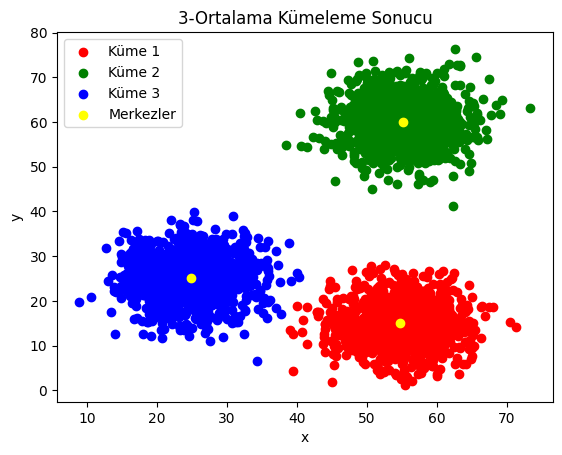

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# KMeans modelini oluştur
k_ortalama = KMeans(n_clusters=3)
kumeler = k_ortalama.fit_predict(data)

# Veriye etiket sütunu ekle
data["label"] = kumeler

# Kümeleme sonuçlarını görselleştir
plt.figure()
plt.scatter(data.x[data.label == 0], data.y[data.label == 0], color="red", label="Küme 1")
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], color="green", label="Küme 2")
plt.scatter(data.x[data.label == 2], data.y[data.label == 2], color="blue", label="Küme 3")

# Küme merkezlerini görselleştir
plt.scatter(k_ortalama.cluster_centers_[:, 0], k_ortalama.cluster_centers_[:, 1], color="yellow", label="Merkezler") #cluster merkezleri de görüldü burada

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3-Ortalama Kümeleme Sonucu")
plt.show()
